In [1]:
import sys
from pathlib import Path
module_path = str(Path.cwd() / "src")
if module_path not in sys.path:
    sys.path.append(module_path)
from reader import Reader
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import cv2
import os
from skimage import exposure, transform
import pickle
import tensorflow as tf

In [2]:
file = open(r"D:/picklefiles/data_3.pickle", 'rb')
data = pickle.load(file)
file.close()
file = open(r"D:/picklefiles/labels_3.pickle", 'rb')
labels = pickle.load(file)
file.close()

In [3]:
input_shape = data[0].shape
print(input_shape)
print(labels[0])
#cv2.imshow("test", data[0])
#cv2.waitKey()
#cv2.destroyAllWindows()

(128, 192, 3)
{(37.48571428571429, 4.8, 59.42857142857143, 28.0): 17, (68.57142857142857, 68.57142857142857, 91.42857142857143, 91.42857142857143): 7, (163.63636363636363, 35.63636363636363, 187.63636363636363, 60.36363636363636): 18}


In [4]:
targets = []

for k in labels:
    a = list(k.keys())
    print(a, "\n")
    a.sort(key=lambda x: (x[0], x[1]))
    print(a, "\n")
    temp = []
    for e in k:
        x1, y1, x2, y2 = e
        h, w = input_shape[:2]
        x1 = x1/w
        y1 = y1/h
        x2 = x2/w
        y2 = y2/h
        temp.append(x1)
        temp.append(y1)
        temp.append(x2)
        temp.append(y2)
    targets.append(temp)

[(37.48571428571429, 4.8, 59.42857142857143, 28.0), (68.57142857142857, 68.57142857142857, 91.42857142857143, 91.42857142857143), (163.63636363636363, 35.63636363636363, 187.63636363636363, 60.36363636363636)] 

[(37.48571428571429, 4.8, 59.42857142857143, 28.0), (68.57142857142857, 68.57142857142857, 91.42857142857143, 91.42857142857143), (163.63636363636363, 35.63636363636363, 187.63636363636363, 60.36363636363636)] 

[(132.7058823529412, 5.485714285714286, 154.35294117647058, 26.514285714285716), (35.80952380952381, 35.63636363636363, 60.19047619047619, 60.36363636363636), (4.444444444444445, 68.44444444444444, 27.555555555555557, 91.55555555555556)] 

[(4.444444444444445, 68.44444444444444, 27.555555555555557, 91.55555555555556), (35.80952380952381, 35.63636363636363, 60.19047619047619, 60.36363636363636), (132.7058823529412, 5.485714285714286, 154.35294117647058, 26.514285714285716)] 

[(130.75862068965517, 99.14754098360656, 157.24137931034483, 125.37704918032787), (167.111111111


[(4.444444444444445, 68.44444444444444, 26.666666666666668, 90.66666666666667), (35.49090909090909, 67.49090909090908, 61.09090909090909, 93.0909090909091), (36.44444444444444, 101.1891891891892, 59.55555555555556, 123.67567567567568)] 

[(5.333333333333333, 101.48571428571428, 27.555555555555557, 123.42857142857143), (2.9690721649484537, 66.82352941176471, 29.36082474226804, 93.17647058823529), (68.84848484848484, 36.84848484848485, 91.15151515151516, 59.151515151515156)] 

[(2.9690721649484537, 66.82352941176471, 29.36082474226804, 93.17647058823529), (5.333333333333333, 101.48571428571428, 27.555555555555557, 123.42857142857143), (68.84848484848484, 36.84848484848485, 91.15151515151516, 59.151515151515156)] 

[(37.16129032258065, 102.4, 58.83870967741936, 122.66666666666667), (162.53968253968253, 98.5, 189.46031746031747, 125.5), (130.74285714285713, 98.56, 157.25714285714287, 125.44)] 

[(37.16129032258065, 102.4, 58.83870967741936, 122.66666666666667), (130.74285714285713, 98.56,

[(5.714285714285714, 37.51724137931035, 26.285714285714285, 58.48275862068965), (66.98666666666666, 99.02702702702703, 93.01333333333334, 125.4054054054054), (132.57142857142858, 4.2105263157894735, 155.42857142857142, 27.789473684210527)] 

[(162.9090909090909, 99.36842105263158, 189.0909090909091, 125.19298245614036), (35.63636363636363, 99.63636363636364, 60.36363636363636, 124.36363636363636), (132.26666666666668, 99.55555555555556, 155.73333333333335, 123.73333333333333)] 

[(35.63636363636363, 99.63636363636364, 60.36363636363636, 124.36363636363636), (132.26666666666668, 99.55555555555556, 155.73333333333335, 123.73333333333333), (162.9090909090909, 99.36842105263158, 189.0909090909091, 125.19298245614036)] 

[(66.9090909090909, 99.49090909090908, 93.0909090909091, 125.0909090909091), (101.33333333333333, 6.193548387096774, 122.66666666666667, 26.838709677419356), (165.4857142857143, 100.57142857142857, 187.42857142857142, 123.42857142857143)] 

[(66.9090909090909, 99.4909090909

[(4.682926829268292, 67.72093023255815, 27.317073170731707, 91.53488372093022), (34.63917525773196, 99.1304347826087, 61.360824742268036, 125.21739130434783), (132.0, 36.0, 156.66666666666666, 60.66666666666667)] 

[(4.682926829268292, 67.72093023255815, 27.317073170731707, 91.53488372093022), (34.63917525773196, 99.1304347826087, 61.360824742268036, 125.21739130434783), (132.0, 36.0, 156.66666666666666, 60.66666666666667)] 

[(3.764705882352941, 35.13725490196079, 28.862745098039216, 60.86274509803921), (5.818181818181818, 5.647058823529412, 27.151515151515152, 27.294117647058822), (68.84848484848484, 101.6470588235294, 91.15151515151516, 122.35294117647058)] 

[(3.764705882352941, 35.13725490196079, 28.862745098039216, 60.86274509803921), (5.818181818181818, 5.647058823529412, 27.151515151515152, 27.294117647058822), (68.84848484848484, 101.6470588235294, 91.15151515151516, 122.35294117647058)] 

[(66.73170731707317, 3.0843373493975905, 93.26829268292683, 29.301204819277107), (38.0, 

[(69.1891891891892, 36.44444444444444, 91.67567567567568, 59.55555555555556), (100.8, 100.92307692307692, 123.2, 123.8974358974359), (162.4935064935065, 98.98666666666666, 189.0909090909091, 125.44)] 

[(69.1891891891892, 36.44444444444444, 91.67567567567568, 59.55555555555556), (100.8, 100.92307692307692, 123.2, 123.8974358974359), (162.4935064935065, 98.98666666666666, 189.0909090909091, 125.44)] 

[(130.76543209876544, 35.1219512195122, 157.23456790123456, 61.26829268292683), (101.71428571428571, 101.71428571428571, 122.28571428571428, 122.28571428571428), (101.16129032258064, 5.714285714285714, 122.83870967741936, 26.285714285714285)] 

[(101.16129032258064, 5.714285714285714, 122.83870967741936, 26.285714285714285), (101.71428571428571, 101.71428571428571, 122.28571428571428, 122.28571428571428), (130.76543209876544, 35.1219512195122, 157.23456790123456, 61.26829268292683)] 

[(133.92592592592592, 37.925925925925924, 154.07407407407408, 58.074074074074076), (99.63636363636364, 100


[(130.95384615384614, 35.294117647058826, 157.53846153846155, 61.17647058823529), (66.53968253968254, 3.2, 93.46031746031746, 29.257142857142856), (5.333333333333333, 38.62068965517241, 26.666666666666668, 58.48275862068965)] 

[(5.333333333333333, 38.62068965517241, 26.666666666666668, 58.48275862068965), (66.53968253968254, 3.2, 93.46031746031746, 29.257142857142856), (130.95384615384614, 35.294117647058826, 157.53846153846155, 61.17647058823529)] 

[(5.818181818181818, 5.333333333333333, 27.151515151515152, 27.555555555555557), (165.64705882352942, 4.848484848484849, 187.2941176470588, 27.151515151515152), (101.33333333333333, 100.70588235294117, 123.55555555555556, 123.29411764705883)] 

[(5.818181818181818, 5.333333333333333, 27.151515151515152, 27.555555555555557), (101.33333333333333, 100.70588235294117, 123.55555555555556, 123.29411764705883), (165.64705882352942, 4.848484848484849, 187.2941176470588, 27.151515151515152)] 

[(36.57142857142857, 99.90243902439025, 60.1904761904

[(4.2105263157894735, 4.923076923076923, 27.789473684210527, 27.897435897435898), (38.62068965517241, 70.62068965517241, 57.37931034482759, 90.48275862068965), (102.85714285714286, 38.857142857142854, 122.28571428571428, 58.285714285714285)] 

[(98.93333333333334, 98.83870967741936, 125.33333333333333, 125.41935483870968), (70.19354838709677, 69.33333333333333, 90.83870967741936, 90.66666666666667), (163.33333333333334, 35.91836734693877, 188.66666666666666, 60.734693877551024)] 

[(70.19354838709677, 69.33333333333333, 90.83870967741936, 90.66666666666667), (98.93333333333334, 98.83870967741936, 125.33333333333333, 125.41935483870968), (163.33333333333334, 35.91836734693877, 188.66666666666666, 60.734693877551024)] 

[(67.80952380952381, 36.57142857142857, 92.19047619047619, 60.19047619047619), (99.6923076923077, 67.07692307692308, 124.92307692307692, 92.92307692307692), (99.49090909090908, 3.4909090909090907, 125.0909090909091, 29.09090909090909)] 

[(67.80952380952381, 36.5714285714

[(35.69230769230769, 99.40425531914893, 60.92307692307692, 124.59574468085106), (67.36842105263158, 67.76470588235294, 93.19298245614036, 92.86274509803921), (98.96296296296296, 67.13725490196079, 125.03703703703704, 92.86274509803921)] 

[(38.193548387096776, 6.857142857142857, 58.83870967741936, 26.285714285714285), (34.716981132075475, 66.75862068965517, 61.283018867924525, 93.24137931034483), (102.19354838709677, 38.193548387096776, 122.83870967741936, 58.83870967741936)] 

[(34.716981132075475, 66.75862068965517, 61.283018867924525, 93.24137931034483), (38.193548387096776, 6.857142857142857, 58.83870967741936, 26.285714285714285), (102.19354838709677, 38.193548387096776, 122.83870967741936, 58.83870967741936)] 

[(98.56, 66.76543209876543, 125.44, 93.23456790123457), (36.44444444444444, 5.485714285714286, 59.55555555555556, 27.428571428571427), (131.2941176470588, 66.86567164179104, 157.1764705882353, 93.13432835820896)] 

[(36.44444444444444, 5.485714285714286, 59.55555555555556,

[(3.7209302325581395, 4.363636363636363, 28.27906976744186, 28.363636363636363), (131.90243902439025, 3.902439024390244, 156.09756097560975, 28.097560975609756), (162.7076923076923, 34.983050847457626, 189.2923076923077, 61.28813559322034)] 

[(98.5, 3.096774193548387, 125.5, 29.419354838709676), (37.64705882352941, 69.6470588235294, 59.294117647058826, 91.29411764705883), (133.16129032258064, 102.4, 154.83870967741936, 121.6)] 

[(37.64705882352941, 69.6470588235294, 59.294117647058826, 91.29411764705883), (98.5, 3.096774193548387, 125.5, 29.419354838709676), (133.16129032258064, 102.4, 154.83870967741936, 121.6)] 

[(100.46511627906976, 36.266666666666666, 123.53488372093022, 60.44444444444444), (69.51724137931035, 6.193548387096774, 90.48275862068965, 26.838709677419356), (37.333333333333336, 36.57142857142857, 59.55555555555556, 58.51428571428572)] 

[(37.333333333333336, 36.57142857142857, 59.55555555555556, 58.51428571428572), (69.51724137931035, 6.193548387096774, 90.48275862068

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





[(101.81818181818181, 100.70588235294117, 123.15151515151516, 123.29411764705883), (134.4, 102.0, 154.66666666666666, 122.0), (164.6829268292683, 100.8, 188.09756097560975, 124.0)] 

[(68.6829268292683, 68.8, 92.09756097560975, 92.0), (100.44444444444444, 37.18918918918919, 123.55555555555556, 59.67567567567568), (163.0188679245283, 66.72340425531915, 188.9811320754717, 93.27659574468085)] 

[(68.6829268292683, 68.8, 92.09756097560975, 92.0), (100.44444444444444, 37.18918918918919, 123.55555555555556, 59.67567567567568), (163.0188679245283, 66.72340425531915, 188.9811320754717, 93.27659574468085)] 

[(132.44444444444446, 100.92307692307692, 155.55555555555554, 123.07692307692308), (164.57142857142858, 99.90243902439025, 188.1904761904762, 124.09756097560975), (99.33333333333333, 35.333333333333336, 124.66666666666667, 60.66666666666667)] 

[(99.33333333333333, 35.333333333333336, 124.66666666666667, 60.66666666666667), (132.44444444444446, 100.92307692307692, 155.55555555555554, 123.

[(99.90243902439025, 99.90243902439025, 124.09756097560975, 124.09756097560975), (70.0, 102.0, 91.0, 123.0), (98.86567164179104, 67.2, 125.13432835820896, 93.33333333333333)] 

[(70.0, 102.0, 91.0, 123.0), (98.86567164179104, 67.2, 125.13432835820896, 93.33333333333333), (99.90243902439025, 99.90243902439025, 124.09756097560975, 124.09756097560975)] 

[(36.0, 3.3333333333333335, 60.66666666666667, 28.666666666666668), (162.76923076923077, 66.9090909090909, 189.23076923076923, 93.45454545454545), (4.102564102564102, 35.90243902439025, 27.897435897435898, 60.09756097560975)] 

[(4.102564102564102, 35.90243902439025, 27.897435897435898, 60.09756097560975), (36.0, 3.3333333333333335, 60.66666666666667, 28.666666666666668), (162.76923076923077, 66.9090909090909, 189.23076923076923, 93.45454545454545)] 

[(133.71428571428572, 37.51724137931035, 154.28571428571428, 58.48275862068965), (163.69230769230768, 99.6923076923077, 188.92307692307693, 124.92307692307692), (4.444444444444445, 100.84848

[(35.0188679245283, 3.076923076923077, 60.9811320754717, 28.923076923076923), (131.11111111111111, 67.11111111111111, 157.33333333333334, 93.33333333333333), (100.6829268292683, 68.44444444444444, 124.09756097560975, 91.55555555555556)] 

[(35.0188679245283, 3.076923076923077, 60.9811320754717, 28.923076923076923), (100.6829268292683, 68.44444444444444, 124.09756097560975, 91.55555555555556), (131.11111111111111, 67.11111111111111, 157.33333333333334, 93.33333333333333)] 

[(68.0, 67.80952380952381, 92.0, 91.42857142857143), (165.51724137931035, 37.16129032258065, 186.48275862068965, 58.83870967741936), (3.84, 67.47826086956522, 28.8, 92.52173913043478)] 

[(3.84, 67.47826086956522, 28.8, 92.52173913043478), (68.0, 67.80952380952381, 92.0, 91.42857142857143), (165.51724137931035, 37.16129032258065, 186.48275862068965, 58.83870967741936)] 

[(38.62068965517241, 101.33333333333333, 58.48275862068965, 122.66666666666667), (132.7058823529412, 4.571428571428571, 155.2941176470588, 27.428571


[(3.8095238095238093, 3.902439024390244, 27.428571428571427, 27.317073170731707), (98.88888888888889, 98.816, 125.11111111111111, 125.44), (162.9090909090909, 98.57142857142857, 189.38181818181818, 125.42857142857143)] 

[(100.92307692307692, 101.1891891891892, 123.8974358974359, 123.67567567567568), (164.57142857142858, 100.84848484848484, 186.5142857142857, 123.15151515151516), (162.88, 66.7897435897436, 189.28, 93.37435897435897)] 

[(100.92307692307692, 101.1891891891892, 123.8974358974359, 123.67567567567568), (162.88, 66.7897435897436, 189.28, 93.37435897435897), (164.57142857142858, 100.84848484848484, 186.5142857142857, 123.15151515151516)] 

[(3.764705882352941, 3.2, 28.235294117647058, 28.16), (162.71186440677965, 35.49090909090909, 189.28813559322035, 60.50909090909091), (133.64705882352942, 36.57142857142857, 155.2941176470588, 59.42857142857143)] 

[(3.764705882352941, 3.2, 28.235294117647058, 28.16), (133.64705882352942, 36.57142857142857, 155.2941176470588, 59.428571428

[(34.857142857142854, 67.36842105263158, 61.14285714285714, 93.19298245614036), (66.63529411764706, 98.76543209876543, 93.36470588235294, 125.23456790123457), (162.66666666666666, 67.2463768115942, 188.88888888888889, 92.7536231884058)] 

[(2.704225352112676, 66.97674418604652, 29.295774647887324, 93.27131782945736), (36.92307692307692, 36.21052631578947, 59.8974358974359, 59.78947368421053), (130.8235294117647, 66.74285714285715, 157.1764705882353, 93.25714285714285)] 

[(2.704225352112676, 66.97674418604652, 29.295774647887324, 93.27131782945736), (36.92307692307692, 36.21052631578947, 59.8974358974359, 59.78947368421053), (130.8235294117647, 66.74285714285715, 157.1764705882353, 93.25714285714285)] 

[(3.4285714285714284, 99.36842105263158, 28.571428571428573, 124.63157894736842), (70.19354838709677, 101.81818181818181, 90.83870967741936, 123.15151515151516), (36.1025641025641, 4.102564102564102, 59.8974358974359, 27.897435897435898)] 

[(3.4285714285714284, 99.36842105263158, 28.57

[(98.66666666666667, 66.96907216494846, 125.33333333333333, 93.36082474226804), (162.74285714285713, 2.953846153846154, 189.25714285714287, 29.53846153846154), (35.14754098360656, 35.0188679245283, 61.37704918032787, 60.9811320754717)] 

[(35.14754098360656, 35.0188679245283, 61.37704918032787, 60.9811320754717), (98.66666666666667, 66.96907216494846, 125.33333333333333, 93.36082474226804), (162.74285714285713, 2.953846153846154, 189.25714285714287, 29.53846153846154)] 

[(35.91836734693877, 4.465116279069767, 60.734693877551024, 28.27906976744186), (166.85714285714286, 101.71428571428571, 186.28571428571428, 122.28571428571428), (130.86567164179104, 98.82352941176471, 157.37313432835822, 125.41176470588235)] 

[(35.91836734693877, 4.465116279069767, 60.734693877551024, 28.27906976744186), (130.86567164179104, 98.82352941176471, 157.37313432835822, 125.41176470588235), (166.85714285714286, 101.71428571428571, 186.28571428571428, 122.28571428571428)] 

[(164.92307692307693, 68.571428571

[(131.8095238095238, 3.6363636363636362, 156.1904761904762, 28.363636363636363), (132.08510638297872, 99.63636363636364, 156.59574468085106, 124.36363636363636), (3.7209302325581395, 35.72093023255814, 28.27906976744186, 60.27906976744186)] 

[(3.7209302325581395, 35.72093023255814, 28.27906976744186, 60.27906976744186), (131.8095238095238, 3.6363636363636362, 156.1904761904762, 28.363636363636363), (132.08510638297872, 99.63636363636364, 156.59574468085106, 124.36363636363636)] 

[(165.92592592592592, 38.4, 186.07407407407408, 58.66666666666667), (66.86567164179104, 98.74285714285715, 93.29353233830847, 125.25714285714285), (67.2542372881356, 3.3684210526315788, 93.28813559322035, 28.63157894736842)] 

[(66.86567164179104, 98.74285714285715, 93.29353233830847, 125.25714285714285), (67.2542372881356, 3.3684210526315788, 93.28813559322035, 28.63157894736842), (165.92592592592592, 38.4, 186.07407407407408, 58.66666666666667)] 

[(102.62068965517241, 69.33333333333333, 122.48275862068965,


[(100.08510638297872, 100.17391304347827, 123.91489361702128, 123.82608695652173), (134.6206896551724, 101.71428571428571, 154.48275862068965, 122.28571428571428), (163.84, 36.17391304347826, 188.8, 59.826086956521735)] 

[(130.96296296296296, 66.96296296296296, 157.03703703703704, 93.03703703703704), (101.81818181818181, 69.0, 123.15151515151516, 91.0), (162.6422018348624, 98.88288288288288, 189.3577981651376, 125.4054054054054)] 

[(101.81818181818181, 69.0, 123.15151515151516, 91.0), (130.96296296296296, 66.96296296296296, 157.03703703703704, 93.03703703703704), (162.6422018348624, 98.88288288288288, 189.3577981651376, 125.4054054054054)] 

[(69.92592592592592, 67.72093023255815, 90.07407407407408, 91.53488372093022), (133.4857142857143, 5.818181818181818, 155.42857142857142, 27.151515151515152), (166.4, 6.0, 186.66666666666666, 27.0)] 

[(69.92592592592592, 67.72093023255815, 90.07407407407408, 91.53488372093022), (133.4857142857143, 5.818181818181818, 155.42857142857142, 27.15151

[(164.08510638297872, 36.08510638297872, 188.59574468085106, 60.59574468085106), (68.17391304347827, 67.55555555555556, 92.52173913043478, 92.44444444444444), (99.6923076923077, 99.6923076923077, 124.92307692307692, 124.92307692307692)] 

[(68.17391304347827, 67.55555555555556, 92.52173913043478, 92.44444444444444), (99.6923076923077, 99.6923076923077, 124.92307692307692, 124.92307692307692), (164.08510638297872, 36.08510638297872, 188.59574468085106, 60.59574468085106)] 

[(99.55555555555556, 36.17391304347826, 124.44444444444444, 60.52173913043478), (68.8, 68.92307692307692, 91.2, 91.07692307692308), (34.5, 34.95384615384616, 61.5, 61.53846153846154)] 

[(34.5, 34.95384615384616, 61.5, 61.53846153846154), (68.8, 68.92307692307692, 91.2, 91.07692307692308), (99.55555555555556, 36.17391304347826, 124.44444444444444, 60.52173913043478)] 

[(38.193548387096776, 69.33333333333333, 58.83870967741936, 90.66666666666667), (5.333333333333333, 70.19354838709677, 26.666666666666668, 90.83870967

[(99.80952380952381, 35.72093023255814, 124.19047619047619, 60.27906976744186), (35.76470588235294, 66.75862068965517, 60.86274509803921, 93.24137931034483), (66.66666666666667, 66.66666666666667, 93.33333333333333, 93.33333333333333)] 

[(35.76470588235294, 66.75862068965517, 60.86274509803921, 93.24137931034483), (66.66666666666667, 66.66666666666667, 93.33333333333333, 93.33333333333333), (99.80952380952381, 35.72093023255814, 124.19047619047619, 60.27906976744186)] 

[(164.84848484848484, 101.6470588235294, 187.15151515151516, 123.29411764705883), (36.1025641025641, 4.2105263157894735, 59.8974358974359, 26.94736842105263), (69.33333333333333, 38.193548387096776, 90.66666666666667, 58.83870967741936)] 

[(36.1025641025641, 4.2105263157894735, 59.8974358974359, 26.94736842105263), (69.33333333333333, 38.193548387096776, 90.66666666666667, 58.83870967741936), (164.84848484848484, 101.6470588235294, 187.15151515151516, 123.29411764705883)] 

[(100.1025641025641, 4.2105263157894735, 123

In [5]:
# convert the data and targets to NumPy arrays, scaling the input
# pixel intensities from the range [0, 255] to [0, 1]
data = np.array(data, dtype="float32") / 255.0
targets = np.array(targets, dtype="float32")

# partition the data into training and testing splits using 90% of
# the data for training and the remaining 10% for testing
split = train_test_split(data, targets, test_size=0.25, random_state=42)

# unpack the data split
(trainImages, testImages) = split[:2]
(trainTargets, testTargets) = split[2:4]

# partition the data into training and testing splits using 90% of
# the data for training and the remaining 10% for testing
split = train_test_split(testImages, testTargets, test_size=0.5, random_state=42)

# unpack the data split
(validationImages, testImages) = split[:2]
(validationTargets, testTargets) = split[2:4]

In [6]:
input_layer = Input(input_shape)

#create the base layers
base_layers = Conv2D(16, 3, padding='same', activation='relu', name='bl_2')(input_layer)
base_layers = MaxPooling2D(name='bl_3')(base_layers)
base_layers = Conv2D(32, 3, padding='same', activation='relu', name='bl_4')(base_layers)
base_layers = MaxPooling2D(name='bl_5')(base_layers)
base_layers = Conv2D(64, 3, padding='same', activation='relu', name='bl_6')(base_layers)
base_layers = MaxPooling2D(name='bl_7')(base_layers)
base_layers = Flatten(name='bl_8')(base_layers)

In [7]:
#create the localiser branch
locator_branch = Dense(128, activation='relu', name='bb_1')(base_layers)
locator_branch = Dense(64, activation='relu', name='bb_2')(locator_branch)
locator_branch = Dense(32, activation='relu', name='bb_3')(locator_branch)
locator_branch = Dense(12, activation='sigmoid', name='bb_head')(locator_branch)

In [8]:
model = tf.keras.Model(input_layer, outputs=locator_branch)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 192, 3)]     0         
_________________________________________________________________
bl_2 (Conv2D)                (None, 128, 192, 16)      448       
_________________________________________________________________
bl_3 (MaxPooling2D)          (None, 64, 96, 16)        0         
_________________________________________________________________
bl_4 (Conv2D)                (None, 64, 96, 32)        4640      
_________________________________________________________________
bl_5 (MaxPooling2D)          (None, 32, 48, 32)        0         
_________________________________________________________________
bl_6 (Conv2D)                (None, 32, 48, 64)        18496     
_________________________________________________________________
bl_7 (MaxPooling2D)          (None, 16, 24, 64)        0     

In [10]:
model.compile(loss=tf.keras.losses.MAE, optimizer='Adam')#, metrics=['accuracy']

In [11]:
history = model.fit(trainImages, trainTargets,
             validation_data=(validationImages, validationTargets),
             batch_size=4,
             epochs=3,
             shuffle=True,
             verbose=1)

Epoch 1/3
3750/3750 [==============================] - 85s 23ms/step - loss: 0.2052 - val_loss: 0.1833
Epoch 2/3
3750/3750 [==============================] - 86s 23ms/step - loss: 0.1787 - val_loss: 0.1806
Epoch 3/3
3750/3750 [==============================] - 85s 23ms/step - loss: 0.1743 - val_loss: 0.1753


[INFO] saving object detector model...


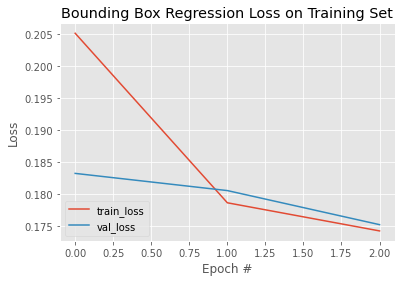

In [12]:
# serialize the model to disk
print("[INFO] saving object detector model...")
model.save(r"models/models_regr_3", save_format="h5")

# plot the model training history
N = 3#NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.title("Bounding Box Regression Loss on Training Set")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

In [ ]:
model = load_model(r"models/models_regr_3")
for image, bounding in zip(testImages, testTargets):
    preds = model.predict(np.expand_dims(image, 0))
    preds = preds[0]
    
    for i in range(3):
        #print(preds)
        (startX, startY, endX, endY) = preds[i*4:(i+1)*4]
        b = bounding[i*4:(i+1)*4]
        h, w = image.shape[:2]

        # scale the predicted bounding box coordinates based on the image
        # dimensions
        startX = int(startX * w)
        startY = int(startY * h)
        endX = int(endX * w)
        endY = int(endY * h)
        
        print(bounding)
        boundingX1 = int(b[0]*w)
        boundingY1 = int(b[1]*h)
        boundingX2 = int(b[2]*w)
        boundingY2 = int(b[3]*h)

        # draw the predicted bounding box on the image
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 1)
        cv2.rectangle(image, (boundingX1, boundingY1), (boundingX2, boundingY2), (0, 0, 255), 1)

    # show the output image
    cv2.namedWindow('Output', cv2.WINDOW_NORMAL)
    cv2.imshow("Output", image)
    cv2.waitKey(0)

[0.6875     0.7905405  0.80833334 0.9662162  0.02083333 0.5365854
 0.14166667 0.7134146  0.36363637 0.54545456 0.47474748 0.7121212 ]
[0.6875     0.7905405  0.80833334 0.9662162  0.02083333 0.5365854
 0.14166667 0.7134146  0.36363637 0.54545456 0.47474748 0.7121212 ]
[0.6875     0.7905405  0.80833334 0.9662162  0.02083333 0.5365854
 0.14166667 0.7134146  0.36363637 0.54545456 0.47474748 0.7121212 ]
[0.5277778  0.28947368 0.6435185  0.46710527 0.01666667 0.5215517
 0.15277778 0.7284483  0.01893939 0.28658536 0.14772727 0.4695122 ]
[0.5277778  0.28947368 0.6435185  0.46710527 0.01666667 0.5215517
 0.15277778 0.7284483  0.01893939 0.28658536 0.14772727 0.4695122 ]
[0.5277778  0.28947368 0.6435185  0.46710527 0.01666667 0.5215517
 0.15277778 0.7284483  0.01893939 0.28658536 0.14772727 0.4695122 ]
[0.02272727 0.53409094 0.14772727 0.72159094 0.8493976  0.02272727
 0.9839357  0.23051947 0.6935484  0.8035714  0.8064516  0.95535713]
[0.02272727 0.53409094 0.14772727 0.72159094 0.8493976  0.022

[0.6979167  0.04032258 0.8072917  0.20967741 0.5297619  0.79310346
 0.6369048  0.95689654 0.6879433  0.28658536 0.81560284 0.4695122 ]
[0.6979167  0.04032258 0.8072917  0.20967741 0.5297619  0.79310346
 0.6369048  0.95689654 0.6879433  0.28658536 0.81560284 0.4695122 ]
[0.6979167  0.04032258 0.8072917  0.20967741 0.5297619  0.79310346
 0.6369048  0.95689654 0.6879433  0.28658536 0.81560284 0.4695122 ]
[0.01302083 0.0234375  0.15364583 0.23046875 0.359375   0.53571427
 0.47395834 0.71428573 0.53571427 0.30172414 0.6369048  0.44827586]
[0.01302083 0.0234375  0.15364583 0.23046875 0.359375   0.53571427
 0.47395834 0.71428573 0.53571427 0.30172414 0.6369048  0.44827586]
[0.01302083 0.0234375  0.15364583 0.23046875 0.359375   0.53571427
 0.47395834 0.71428573 0.53571427 0.30172414 0.6369048  0.44827586]
[0.6824324  0.27469134 0.8198198  0.47530866 0.5277778  0.29166666
 0.6435185  0.4652778  0.8603604  0.79285717 0.9774775  0.96428573]
[0.6824324  0.27469134 0.8198198  0.47530866 0.5277778 

[0.859375   0.7890625  0.9739583  0.9609375  0.36419752 0.30555555
 0.4691358  0.44444445 0.6847826  0.2784091  0.8152174  0.4715909 ]
[0.859375   0.7890625  0.9739583  0.9609375  0.36419752 0.30555555
 0.4691358  0.44444445 0.6847826  0.2784091  0.8152174  0.4715909 ]
[0.859375   0.7890625  0.9739583  0.9609375  0.36419752 0.30555555
 0.4691358  0.44444445 0.6847826  0.2784091  0.8152174  0.4715909 ]
[0.8678161  0.80172414 0.97126436 0.95689654 0.5294118  0.7941176
 0.64215684 0.9632353  0.35964912 0.28947368 0.47807017 0.46710527]
[0.8678161  0.80172414 0.97126436 0.95689654 0.5294118  0.7941176
 0.64215684 0.9632353  0.35964912 0.28947368 0.47807017 0.46710527]
[0.8678161  0.80172414 0.97126436 0.95689654 0.5294118  0.7941176
 0.64215684 0.9632353  0.35964912 0.28947368 0.47807017 0.46710527]
[0.5170068  0.78       0.6496599  0.975      0.6927083  0.5403226
 0.8020833  0.7096774  0.5277778  0.04411765 0.6388889  0.21323529]
[0.5170068  0.78       0.6496599  0.975      0.6927083  0.5

[0.18209876 0.7731481  0.31790122 0.9768519  0.18402778 0.2777778
 0.3159722  0.47685185 0.68222225 0.77112675 0.82       0.97887325]
[0.18209876 0.7731481  0.31790122 0.9768519  0.18402778 0.2777778
 0.3159722  0.47685185 0.68222225 0.77112675 0.82       0.97887325]
[0.18209876 0.7731481  0.31790122 0.9768519  0.18402778 0.2777778
 0.3159722  0.47685185 0.68222225 0.77112675 0.82       0.97887325]
[0.34735203 0.2734375  0.48442367 0.4765625  0.35858586 0.5416667
 0.47474748 0.7152778  0.01923077 0.77884614 0.15064102 0.97596157]
[0.34735203 0.2734375  0.48442367 0.4765625  0.35858586 0.5416667
 0.47474748 0.7152778  0.01923077 0.77884614 0.15064102 0.97596157]
[0.34735203 0.2734375  0.48442367 0.4765625  0.35858586 0.5416667
 0.47474748 0.7152778  0.01923077 0.77884614 0.15064102 0.97596157]
[0.35784313 0.5367647  0.47549018 0.7132353  0.3472222  0.2704918
 0.4861111  0.4795082  0.6989247  0.29166666 0.8064516  0.45833334]
[0.35784313 0.5367647  0.47549018 0.7132353  0.3472222  0.2704

[0.18981482 0.2837838  0.3101852  0.4662162  0.1891892  0.03378378
 0.3108108  0.21621622 0.18992248 0.53333336 0.31007752 0.71666664]
[0.18981482 0.2837838  0.3101852  0.4662162  0.1891892  0.03378378
 0.3108108  0.21621622 0.18992248 0.53333336 0.31007752 0.71666664]
[0.18981482 0.2837838  0.3101852  0.4662162  0.1891892  0.03378378
 0.3108108  0.21621622 0.18992248 0.53333336 0.31007752 0.71666664]
[0.01937984 0.78333336 0.14728682 0.9722222  0.36363637 0.04545455
 0.47474748 0.21212122 0.52       0.28       0.65       0.475     ]
[0.01937984 0.78333336 0.14728682 0.9722222  0.36363637 0.04545455
 0.47474748 0.21212122 0.52       0.28       0.65       0.475     ]
[0.01937984 0.78333336 0.14728682 0.9722222  0.36363637 0.04545455
 0.47474748 0.21212122 0.52       0.28       0.65       0.475     ]
[0.5185185  0.02314815 0.65123457 0.22222222 0.5141243  0.7708333
 0.65254235 0.9791667  0.01886792 0.275      0.1509434  0.475     ]
[0.5185185  0.02314815 0.65123457 0.22222222 0.5141243  

[0.68126523 0.7724138  0.81995136 0.97931033 0.5163934  0.5208333
 0.6530055  0.7291667  0.84745765 0.7741935  0.9858757  0.9798387 ]
[0.68126523 0.7724138  0.81995136 0.97931033 0.5163934  0.5208333
 0.6530055  0.7291667  0.84745765 0.7741935  0.9858757  0.9798387 ]
[0.68126523 0.7724138  0.81995136 0.97931033 0.5163934  0.5208333
 0.6530055  0.7291667  0.84745765 0.7741935  0.9858757  0.9798387 ]
[0.5252525  0.7905405  0.64141417 0.9662162  0.01412429 0.02586207
 0.14971751 0.22413793 0.6855346  0.02884615 0.8176101  0.22115384]
[0.5252525  0.7905405  0.64141417 0.9662162  0.01412429 0.02586207
 0.14971751 0.22413793 0.6855346  0.02884615 0.8176101  0.22115384]
[0.5252525  0.7905405  0.64141417 0.9662162  0.01412429 0.02586207
 0.14971751 0.22413793 0.6855346  0.02884615 0.8176101  0.22115384]
[0.51937985 0.53333336 0.64728683 0.7222222  0.513468   0.77393615
 0.6515151  0.9787234  0.34705883 0.27272728 0.4862745  0.48011363]
[0.51937985 0.53333336 0.64728683 0.7222222  0.513468   0.

[0.5157233  0.2735849  0.6509434  0.4716981  0.6979167  0.7903226
 0.8072917  0.9596774  0.19270833 0.29032257 0.30208334 0.4516129 ]
[0.5157233  0.2735849  0.6509434  0.4716981  0.6979167  0.7903226
 0.8072917  0.9596774  0.19270833 0.29032257 0.30208334 0.4516129 ]
[0.5157233  0.2735849  0.6509434  0.4716981  0.6979167  0.7903226
 0.8072917  0.9596774  0.19270833 0.29032257 0.30208334 0.4516129 ]
[0.51459855 0.77272725 0.65328467 0.9791667  0.8564815  0.29285714
 0.9768519  0.4642857  0.6979167  0.79545456 0.8072917  0.9621212 ]
[0.51459855 0.77272725 0.65328467 0.9791667  0.8564815  0.29285714
 0.9768519  0.4642857  0.6979167  0.79545456 0.8072917  0.9621212 ]
[0.51459855 0.77272725 0.65328467 0.9791667  0.8564815  0.29285714
 0.9768519  0.4642857  0.6979167  0.79545456 0.8072917  0.9621212 ]
[0.025      0.7837838  0.14583333 0.9662162  0.8666667  0.55
 0.9722222  0.7083333  0.8666667  0.796875   0.9722222  0.9609375 ]
[0.025      0.7837838  0.14583333 0.9662162  0.8666667  0.55
 0.

[0.35772356 0.2826087  0.4796748  0.4728261  0.8531746  0.2797619
 0.98015875 0.4702381  0.8503401  0.5255102  0.9829932  0.7244898 ]
[0.35772356 0.2826087  0.4796748  0.4728261  0.8531746  0.2797619
 0.98015875 0.4702381  0.8503401  0.5255102  0.9829932  0.7244898 ]
[0.35772356 0.2826087  0.4796748  0.4728261  0.8531746  0.2797619
 0.98015875 0.4702381  0.8503401  0.5255102  0.9829932  0.7244898 ]
[0.35784313 0.7916667  0.47058824 0.9583333  0.6796875  0.26953125
 0.8203125  0.48046875 0.1796875  0.76953125 0.3203125  0.98046875]
[0.35784313 0.7916667  0.47058824 0.9583333  0.6796875  0.26953125
 0.8203125  0.48046875 0.1796875  0.76953125 0.3203125  0.98046875]
[0.35784313 0.7916667  0.47058824 0.9583333  0.6796875  0.26953125
 0.8203125  0.48046875 0.1796875  0.76953125 0.3203125  0.98046875]
[0.02314815 0.04166667 0.1388889  0.21527778 0.17982456 0.77205884
 0.32017544 0.97794116 0.8477218  0.2701613  0.9856115  0.47782257]
[0.02314815 0.04166667 0.1388889  0.21527778 0.17982456 0.

[0.7037037  0.5462963  0.80246913 0.7037037  0.5243902  0.53333336
 0.64634144 0.7222222  0.01893939 0.5365854  0.14393939 0.7195122 ]
[0.7037037  0.5462963  0.80246913 0.7037037  0.5243902  0.53333336
 0.64634144 0.7222222  0.01893939 0.5365854  0.14393939 0.7195122 ]
[0.7037037  0.5462963  0.80246913 0.7037037  0.5243902  0.53333336
 0.64634144 0.7222222  0.01893939 0.5365854  0.14393939 0.7195122 ]
[0.68333334 0.02083333 0.81904763 0.22916667 0.85858583 0.79285717
 0.9747475  0.95714283 0.52873564 0.80172414 0.63793105 0.95689654]
[0.68333334 0.02083333 0.81904763 0.22916667 0.85858583 0.79285717
 0.9747475  0.95714283 0.52873564 0.80172414 0.63793105 0.95689654]
[0.68333334 0.02083333 0.81904763 0.22916667 0.85858583 0.79285717
 0.9747475  0.95714283 0.52873564 0.80172414 0.63793105 0.95689654]
[0.52040815 0.52840906 0.6496599  0.71590906 0.02777778 0.796875
 0.1388889  0.953125   0.6805556  0.0221519  0.8194444  0.2278481 ]
[0.52040815 0.52840906 0.6496599  0.71590906 0.02777778 0

[0.52       0.7731481  0.65       0.9768519  0.84656084 0.7754237
 0.9867725  0.9788136  0.6960784  0.7941176  0.8088235  0.9632353 ]
[0.52       0.7731481  0.65       0.9768519  0.84656084 0.7754237
 0.9867725  0.9788136  0.6960784  0.7941176  0.8088235  0.9632353 ]
[0.52       0.7731481  0.65       0.9768519  0.84656084 0.7754237
 0.9867725  0.9788136  0.6960784  0.7941176  0.8088235  0.9632353 ]
[0.8518519  0.02232143 0.9845679  0.22767857 0.8611111  0.29166666
 0.9768519  0.4652778  0.19607843 0.5441176  0.30882353 0.7132353 ]
[0.8518519  0.02232143 0.9845679  0.22767857 0.8611111  0.29166666
 0.9768519  0.4652778  0.19607843 0.5441176  0.30882353 0.7132353 ]
[0.8518519  0.02232143 0.9845679  0.22767857 0.8611111  0.29166666
 0.9768519  0.4652778  0.19607843 0.5441176  0.30882353 0.7132353 ]
[0.8531746  0.03048781 0.97619045 0.2195122  0.3611111  0.796875
 0.4722222  0.953125   0.3560606  0.27659574 0.4810606  0.4680851 ]
[0.8531746  0.03048781 0.97619045 0.2195122  0.3611111  0.79

[0.8564815  0.5441176  0.9768519  0.7132353  0.8466667  0.02
 0.9866667  0.23       0.530303   0.2890625  0.64141417 0.4609375 ]
[0.8564815  0.5441176  0.9768519  0.7132353  0.8466667  0.02
 0.9866667  0.23       0.530303   0.2890625  0.64141417 0.4609375 ]
[0.8564815  0.5441176  0.9768519  0.7132353  0.8466667  0.02
 0.9866667  0.23       0.530303   0.2890625  0.64141417 0.4609375 ]
[0.68939394 0.2804878  0.81439394 0.4695122  0.6969697  0.54464287
 0.8080808  0.70535713 0.53205127 0.28787878 0.63461536 0.46212122]
[0.68939394 0.2804878  0.81439394 0.4695122  0.6969697  0.54464287
 0.8080808  0.70535713 0.53205127 0.28787878 0.63461536 0.46212122]
[0.68939394 0.2804878  0.81439394 0.4695122  0.6969697  0.54464287
 0.8080808  0.70535713 0.53205127 0.28787878 0.63461536 0.46212122]
[0.34795323 0.27542374 0.4853801  0.47457626 0.5157233  0.0255102
 0.6477987  0.2244898  0.8464912  0.2720588  0.9868421  0.4779412 ]
[0.34795323 0.27542374 0.4853801  0.47457626 0.5157233  0.0255102
 0.64779

[0.3564815  0.5441176  0.47685185 0.7132353  0.34666666 0.27227724
 0.48666668 0.48019803 0.6989247  0.5483871  0.8010753  0.7016129 ]
[0.3564815  0.5441176  0.47685185 0.7132353  0.34666666 0.27227724
 0.48666668 0.48019803 0.6989247  0.5483871  0.8010753  0.7016129 ]
[0.3564815  0.5441176  0.47685185 0.7132353  0.34666666 0.27227724
 0.48666668 0.48019803 0.6989247  0.5483871  0.8010753  0.7016129 ]
[0.5344828  0.80172414 0.63793105 0.95689654 0.3531746  0.2797619
 0.48015872 0.4702381  0.0245098  0.3        0.14215687 0.45833334]
[0.5344828  0.80172414 0.63793105 0.95689654 0.3531746  0.2797619
 0.48015872 0.4702381  0.0245098  0.3        0.14215687 0.45833334]
[0.5344828  0.80172414 0.63793105 0.95689654 0.3531746  0.2797619
 0.48015872 0.4702381  0.0245098  0.3        0.14215687 0.45833334]
[0.34931508 0.7736486  0.48630136 0.9797297  0.19791667 0.5403226
 0.30729166 0.7096774  0.02222222 0.03333334 0.14814815 0.22222222]
[0.34931508 0.7736486  0.48630136 0.9797297  0.19791667 0.5

[0.527027   0.28846154 0.6396396  0.46153846 0.6823899  0.2783019
 0.8176101  0.4764151  0.53125    0.55       0.6354167  0.7       ]
[0.527027   0.28846154 0.6396396  0.46153846 0.6823899  0.2783019
 0.8176101  0.4764151  0.53125    0.55       0.6354167  0.7       ]
[0.527027   0.28846154 0.6396396  0.46153846 0.6823899  0.2783019
 0.8176101  0.4764151  0.53125    0.55       0.6354167  0.7       ]
[0.18162394 0.27134147 0.31837606 0.47865853 0.525      0.03947368
 0.64166665 0.21710527 0.8472222  0.77350426 0.9861111  0.97863245]
[0.18162394 0.27134147 0.31837606 0.47865853 0.525      0.03947368
 0.64166665 0.21710527 0.8472222  0.77350426 0.9861111  0.97863245]
[0.18162394 0.27134147 0.31837606 0.47865853 0.525      0.03947368
 0.64166665 0.21710527 0.8472222  0.77350426 0.9861111  0.97863245]
[0.6830065  0.0245098  0.8169935  0.2254902  0.6944444  0.7941176
 0.8055556  0.9632353  0.6823899  0.27314815 0.8176101  0.47685185]
[0.6830065  0.0245098  0.8169935  0.2254902  0.6944444  0.7

[0.02136752 0.77840906 0.14529915 0.97159094 0.5277778  0.5416667
 0.6388889  0.7083333  0.6960784  0.7916667  0.8088235  0.9652778 ]
[0.02136752 0.77840906 0.14529915 0.97159094 0.5277778  0.5416667
 0.6388889  0.7083333  0.6960784  0.7916667  0.8088235  0.9652778 ]
[0.02136752 0.77840906 0.14529915 0.97159094 0.5277778  0.5416667
 0.6388889  0.7083333  0.6960784  0.7916667  0.8088235  0.9652778 ]
[0.36190477 0.7878788  0.47142857 0.9621212  0.849537   0.02430556
 0.9861111  0.22916667 0.0162037  0.52397263 0.15277778 0.7294521 ]
[0.36190477 0.7878788  0.47142857 0.9621212  0.849537   0.02430556
 0.9861111  0.22916667 0.0162037  0.52397263 0.15277778 0.7294521 ]
[0.36190477 0.7878788  0.47142857 0.9621212  0.849537   0.02430556
 0.9861111  0.22916667 0.0162037  0.52397263 0.15277778 0.7294521 ]
[0.68154764 0.5263158  0.81845236 0.7280702  0.18333334 0.5233333
 0.31875    0.73       0.02702703 0.2847222  0.14414415 0.4652778 ]
[0.68154764 0.5263158  0.81845236 0.7280702  0.18333334 0.5

[0.3678161  0.55172414 0.47126436 0.70689654 0.53333336 0.7962963
 0.6333333  0.9537037  0.02777778 0.5416667  0.1388889  0.7083333 ]
[0.3678161  0.55172414 0.47126436 0.70689654 0.53333336 0.7962963
 0.6333333  0.9537037  0.02777778 0.5416667  0.1388889  0.7083333 ]
[0.3678161  0.55172414 0.47126436 0.70689654 0.53333336 0.7962963
 0.6333333  0.9537037  0.02777778 0.5416667  0.1388889  0.7083333 ]
[0.02857143 0.79285717 0.14285715 0.96428573 0.8611111  0.54285717
 0.9768519  0.71428573 0.8522013  0.77403843 0.9842767  0.97596157]
[0.02857143 0.79285717 0.14285715 0.96428573 0.8611111  0.54285717
 0.9768519  0.71428573 0.8522013  0.77403843 0.9842767  0.97596157]
[0.02857143 0.79285717 0.14285715 0.96428573 0.8611111  0.54285717
 0.9768519  0.71428573 0.8522013  0.77403843 0.9842767  0.97596157]
[0.6823899  0.5277778  0.8176101  0.7268519  0.6989247  0.04166667
 0.8064516  0.20833333 0.8486005  0.5201613  0.9847328  0.7298387 ]
[0.6823899  0.5277778  0.8176101  0.7268519  0.6989247  0.

[0.5285714  0.2890625  0.64285713 0.4609375  0.02083333 0.7760417
 0.14930555 0.9739583  0.01736111 0.02777778 0.14930555 0.22222222]
[0.5285714  0.2890625  0.64285713 0.4609375  0.02083333 0.7760417
 0.14930555 0.9739583  0.01736111 0.02777778 0.14930555 0.22222222]
[0.5285714  0.2890625  0.64285713 0.4609375  0.02083333 0.7760417
 0.14930555 0.9739583  0.01736111 0.02777778 0.14930555 0.22222222]
[0.34857723 0.771875   0.48577237 0.9796875  0.8481183  0.02212389
 0.98655915 0.2300885  0.8541667  0.5255102  0.9826389  0.7244898 ]
[0.34857723 0.771875   0.48577237 0.9796875  0.8481183  0.02212389
 0.98655915 0.2300885  0.8541667  0.5255102  0.9826389  0.7244898 ]
[0.34857723 0.771875   0.48577237 0.9796875  0.8481183  0.02212389
 0.98655915 0.2300885  0.8541667  0.5255102  0.9826389  0.7244898 ]
[0.51666665 0.2739726  0.65238094 0.47945204 0.51666665 0.5283019
 0.65       0.7264151  0.18181819 0.2767857  0.3181818  0.47767857]
[0.51666665 0.2739726  0.65238094 0.47945204 0.51666665 0.5

[0.03030303 0.04166667 0.14141414 0.21527778 0.19166666 0.04166667
 0.30833334 0.21527778 0.02173913 0.7826087  0.14492753 0.9673913 ]
[0.03030303 0.04166667 0.14141414 0.21527778 0.19166666 0.04166667
 0.30833334 0.21527778 0.02173913 0.7826087  0.14492753 0.9673913 ]
[0.03030303 0.04166667 0.14141414 0.21527778 0.19166666 0.04166667
 0.30833334 0.21527778 0.02173913 0.7826087  0.14492753 0.9673913 ]
[0.6904762  0.78571427 0.81349206 0.9702381  0.5322581  0.04166667
 0.63978493 0.20833333 0.34876543 0.7772727  0.4814815  0.97727275]
[0.6904762  0.78571427 0.81349206 0.9702381  0.5322581  0.04166667
 0.63978493 0.20833333 0.34876543 0.7772727  0.4814815  0.97727275]
[0.6904762  0.78571427 0.81349206 0.9702381  0.5322581  0.04166667
 0.63978493 0.20833333 0.34876543 0.7772727  0.4814815  0.97727275]
[0.86206895 0.3        0.97126436 0.45833334 0.5263158  0.5337838
 0.6447368  0.7162162  0.6944444  0.03571429 0.8101852  0.21428572]
[0.86206895 0.3        0.97126436 0.45833334 0.5263158  

[0.8611111  0.79545456 0.9722222  0.9621212  0.6855346  0.77884614
 0.8176101  0.97596157 0.5260417  0.79545456 0.640625   0.9621212 ]
[0.8611111  0.79545456 0.9722222  0.9621212  0.6855346  0.77884614
 0.8176101  0.97596157 0.5260417  0.79545456 0.640625   0.9621212 ]
[0.8611111  0.79545456 0.9722222  0.9621212  0.6855346  0.77884614
 0.8176101  0.97596157 0.5260417  0.79545456 0.640625   0.9621212 ]
[0.02941176 0.7878788  0.14215687 0.9621212  0.6803279  0.775
 0.8196721  0.9791667  0.6911765  0.29032257 0.8088235  0.45967743]
[0.02941176 0.7878788  0.14215687 0.9621212  0.6803279  0.775
 0.8196721  0.9791667  0.6911765  0.29032257 0.8088235  0.45967743]
[0.02941176 0.7878788  0.14215687 0.9621212  0.6803279  0.775
 0.8196721  0.9791667  0.6911765  0.29032257 0.8088235  0.45967743]
[0.19791667 0.8        0.30729166 0.9583333  0.52       0.28
 0.65       0.475      0.02604167 0.04545455 0.13541667 0.20454545]
[0.19791667 0.8        0.30729166 0.9583333  0.52       0.28
 0.65       0.4

[0.1952381  0.03571429 0.30952382 0.20714286 0.5212766  0.5255102
 0.64893615 0.7244898  0.84782606 0.025      0.98550725 0.22857143]
[0.1952381  0.03571429 0.30952382 0.20714286 0.5212766  0.5255102
 0.64893615 0.7244898  0.84782606 0.025      0.98550725 0.22857143]
[0.1952381  0.03571429 0.30952382 0.20714286 0.5212766  0.5255102
 0.64893615 0.7244898  0.84782606 0.025      0.98550725 0.22857143]
[0.35833332 0.5365854  0.47916666 0.7195122  0.02040816 0.78409094
 0.14965986 0.97159094 0.19444445 0.5405405  0.3101852  0.7162162 ]
[0.35833332 0.5365854  0.47916666 0.7195122  0.02040816 0.78409094
 0.14965986 0.97159094 0.19444445 0.5405405  0.3101852  0.7162162 ]
[0.35833332 0.5365854  0.47916666 0.7195122  0.02040816 0.78409094
 0.14965986 0.97159094 0.19444445 0.5405405  0.3101852  0.7162162 ]
[0.1923077  0.7875     0.31196582 0.96875    0.5141243  0.27631578
 0.65254235 0.47807017 0.1884058  0.2777778  0.3152174  0.4722222 ]
[0.1923077  0.7875     0.31196582 0.96875    0.5141243  0.